In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0, '../cbcrom')

import timedomainwaveform as tdwave
import timedomainrom as tdrom
import eobtrainingset as eob
import greedy
import empiricalinterpolation as eim
import diagnostics as diagnostics
import chebyshev as cheb

import imp
imp.reload(tdwave)
imp.reload(tdrom)
imp.reload(eob)
imp.reload(greedy)
imp.reload(eim)
imp.reload(diagnostics)
imp.reload(cheb)

<module 'chebyshev' from '../cbcrom/chebyshev.pyc'>

In [4]:
ts_filename = '../data/teob_runs_cheb16_f10_v2_%d.hdf5'
memb_size=2**34-1
ts = tdwave.load_hdf5_time_domain_waveform_set(ts_filename, memb_size=memb_size)

In [5]:
memb_size=2**34-1

filename = '../data/teob_rbamp_smallq_cheb_16_%d.hdf5'
rbamp = tdwave.load_hdf5_time_domain_waveform_set(filename, memb_size=memb_size)

filename = '../data/teob_rbphase_smallq_cheb_16_%d.hdf5'
rbphase = tdwave.load_hdf5_time_domain_waveform_set(filename, memb_size=memb_size)

In [7]:
params = ts.get_parameter_grid()

In [20]:
ampparams = np.array(rbamp.get_parameters())
phaseparams = np.array(rbphase.get_parameters())

In [14]:
x = params[:, :, 0, 0].flatten()
y = params[:, :, 0, 1].flatten()

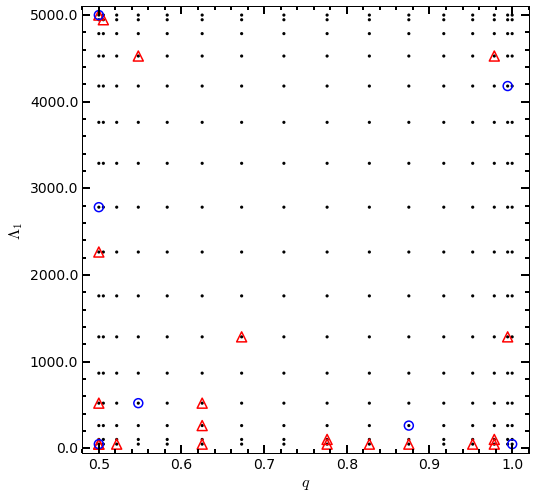

In [50]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(111)
axes.scatter(x, y, edgecolor='none', marker='o', s=10, color='k')
#axes.scatter(ampparams[:, 0], ampparams[:, 1], marker='x', s=100, color='r')
axes.scatter(ampparams[:, 0], ampparams[:, 1], marker='^', s=100, facecolors='none', edgecolors='r', linewidth=1.5)
axes.scatter(phaseparams[:, 0], phaseparams[:, 1], marker='o', s=80, facecolors='none', edgecolors='b', linewidth=1.5)
axes.set_xlim([0.48, 1.02])
axes.set_ylim([-50, 5100])
axes.set_xlabel(r'$q$', fontsize=16)
axes.set_ylabel(r'$\Lambda_1$', fontsize=16)
axes.set_xticklabels(axes.get_xticks(), fontsize=14)
axes.set_yticklabels(axes.get_yticks(), fontsize=14)
axes.minorticks_on()
axes.tick_params(which='major', width=2, length=8)
axes.tick_params(which='minor', width=2, length=4)
fig.savefig('/home/bdlackey/public_html/ROM/paramspace.pdf', 
            format='pdf', transparent=True, bbox_inches='tight')

In [51]:
ampcoeff_filename = '../data/amp_coeffs.hdf5'
phasecoeff_filename = '../data/phase_coeffs.hdf5'

In [53]:
# Extract lists of coefficients for the interpolating functions(params)
amp_coeff_list, params_min, params_max = cheb.load_chebyshev_coefficients_list(ampcoeff_filename)
phase_coeff_list, params_min, params_max = cheb.load_chebyshev_coefficients_list(phasecoeff_filename)

# Generate the amplitude and phase functions(params)
amp_function_list = [cheb.chebyshev_interpolation3d_generator(amp_coeff_list[i], params_min, params_max) 
                     for i in range(len(amp_coeff_list))]
phase_function_list = [cheb.chebyshev_interpolation3d_generator(phase_coeff_list[i], params_min, params_max) 
                       for i in range(len(phase_coeff_list))]

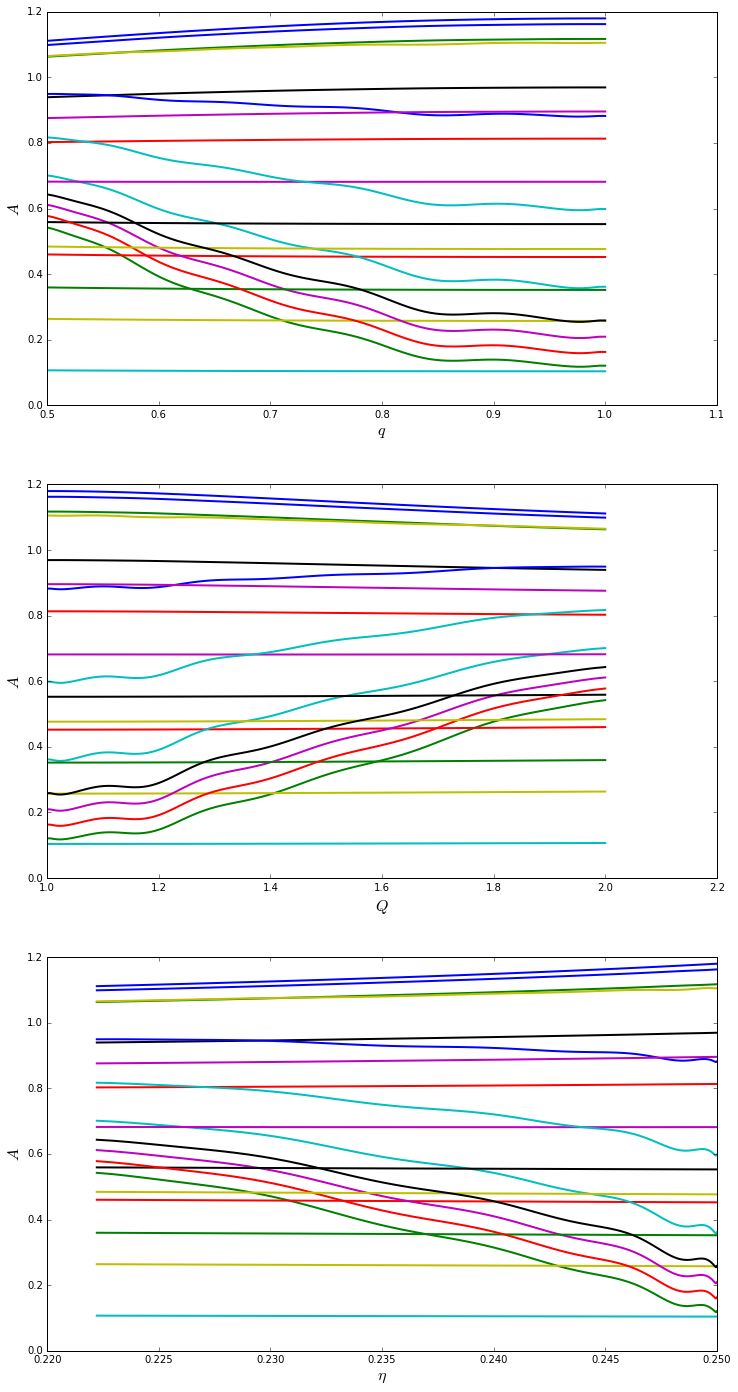

In [131]:
fig = plt.figure(figsize=(12, 24))

for i in range(len(amp_function_list)):
    lam1, lam2 = 50, 50
    qamp = np.array([[q, amp_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])
    Qamp = np.array([[1.0/q, amp_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])
    etaamp = np.array([[q/(1.0+q)**2, amp_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])
    
    axes = fig.add_subplot(311)
    axes.plot(qamp[:, 0], qamp[:, 1], lw=2)
    #axes.set_xlim([10, 100.0])
    #axes.set_ylim([0.1, 100.0])
    axes.set_xlabel(r'$q$', fontsize=16)
    axes.set_ylabel(r'$A$', fontsize=16)
    #axes.legend(fontsize=14, loc='upper right', ncol=1)
    
    axes = fig.add_subplot(312)
    axes.plot(Qamp[:, 0], Qamp[:, 1], lw=2)
    #axes.set_xlim([10, 100.0])
    #axes.set_ylim([0.1, 100.0])
    axes.set_xlabel(r'$Q$', fontsize=16)
    axes.set_ylabel(r'$A$', fontsize=16)
    #axes.legend(fontsize=14, loc='upper right', ncol=1)
    
    axes = fig.add_subplot(313)
    axes.plot(etaamp[:, 0], etaamp[:, 1], lw=2)
    #axes.set_xlim([10, 100.0])
    #axes.set_ylim([0.1, 100.0])
    axes.set_xlabel(r'$\eta$', fontsize=16)
    axes.set_ylabel(r'$A$', fontsize=16)
    #axes.legend(fontsize=14, loc='upper right', ncol=1)

In [78]:
i=2
lam1, lam2 = 50, 50
qphase = np.array([[q, phase_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])
Qphase = np.array([[1.0/q, phase_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])
etaphase = np.array([[q/(1.0+q)**2, phase_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])

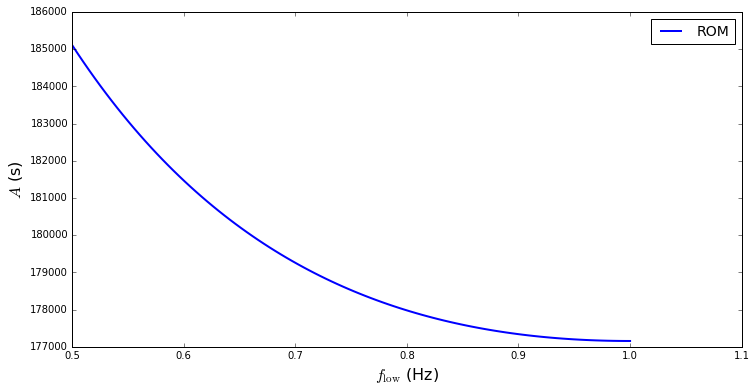

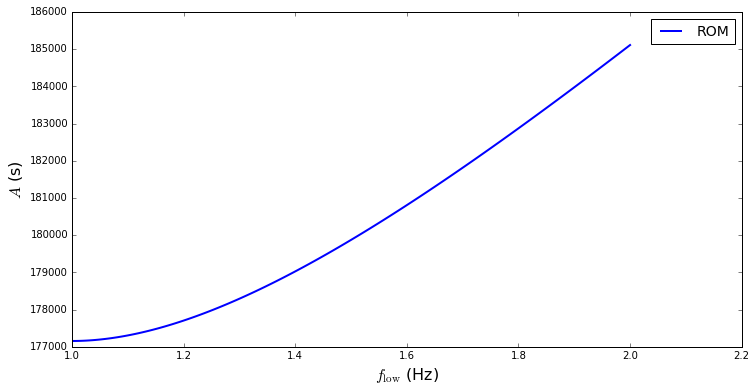

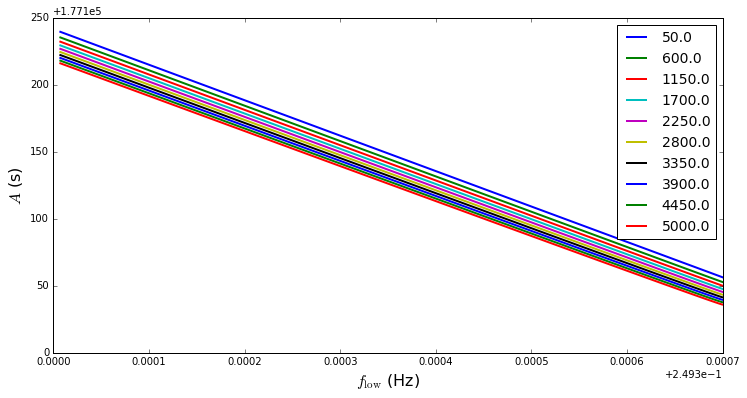

In [81]:
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(111)
axes.plot(qphase[:, 0], qphase[:, 1], lw=2, label='ROM')
#axes.set_xlim([10, 100.0])
#axes.set_ylim([0.1, 100.0])
axes.set_xlabel(r'$f_{\rm low}$ (Hz)', fontsize=16)
axes.set_ylabel(r'$A$ (s)', fontsize=16)
axes.legend(fontsize=14, loc='upper right', ncol=1)

fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(111)
axes.plot(Qphase[:, 0], Qphase[:, 1], lw=2, label='ROM')
#axes.set_xlim([10, 100.0])
#axes.set_ylim([0.1, 100.0])
axes.set_xlabel(r'$f_{\rm low}$ (Hz)', fontsize=16)
axes.set_ylabel(r'$A$ (s)', fontsize=16)
axes.legend(fontsize=14, loc='upper right', ncol=1)


fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(111)
for lam1 in np.linspace(50, 5000, 10):
    etaphase = np.array([[q/(1.0+q)**2, phase_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.9, 1.0, 100)])
    axes.plot(etaphase[:, 0], etaphase[:, 1], lw=2, label=str(lam1))
#axes.set_xlim([0.24, 0.25])
#axes.set_ylim([0.1, 100.0])
axes.set_xlabel(r'$f_{\rm low}$ (Hz)', fontsize=16)
axes.set_ylabel(r'$A$ (s)', fontsize=16)
axes.legend(fontsize=14, loc='upper right', ncol=1)

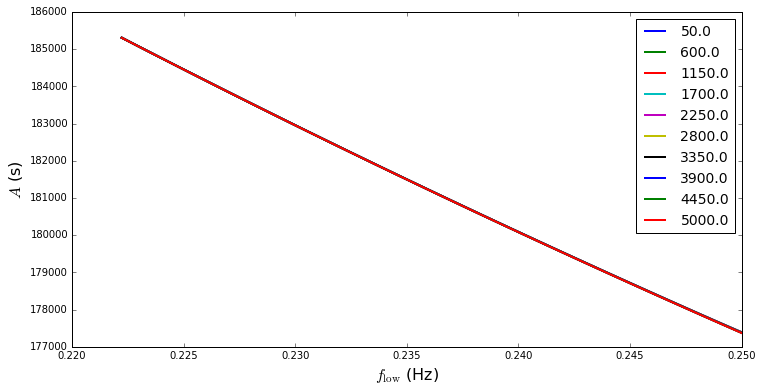

In [91]:
i=6
lam1 = 5000
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(111)
for lam2 in np.linspace(50, 5000, 10):
    etaphase = np.array([[q/(1.0+q)**2, phase_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.5, 1.0, 100)])
    axes.plot(etaphase[:, 0], etaphase[:, 1], lw=2, label=str(lam2))
#axes.set_xlim([0.24, 0.25])
#axes.set_ylim([0.1, 100.0])
axes.set_xlabel(r'$f_{\rm low}$ (Hz)', fontsize=16)
axes.set_ylabel(r'$A$ (s)', fontsize=16)
axes.legend(fontsize=14, loc='upper right', ncol=1)

In [ ]:

fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(111)
etaphase = np.array([[q/(1.0+q)**2, phase_function_list[i]([q, lam1, lam2])] for q in np.linspace(0.9, 1.0, 100)])
axes.plot(etaphase[:, 0], etaphase[:, 1], lw=2)

In [3]:
memb_size=2**26-1
Bamp_filename = '../data/Bamp_%d.hdf5'
Bphase_filename = '../data/Bphase_%d.hdf5'
ampcoeff_filename = '../data/amp_coeffs.hdf5'
phasecoeff_filename = '../data/phase_coeffs.hdf5'
rom = tdrom.load_reduced_order_model_time_domain_waveform(Bamp_filename, Bphase_filename, memb_size,
                                                  ampcoeff_filename, phasecoeff_filename)